Mean Absolute Error (MAE): 20.81
Mean Squared Error (MSE): 1828.65
Root Mean Squared Error (RMSE): 42.76
R² Score: -0.18


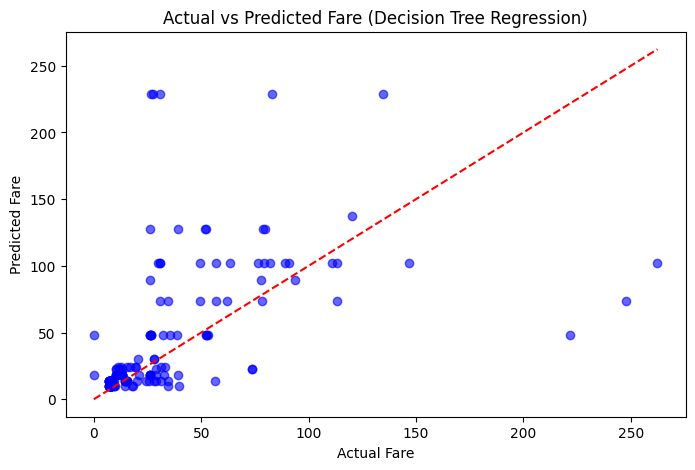

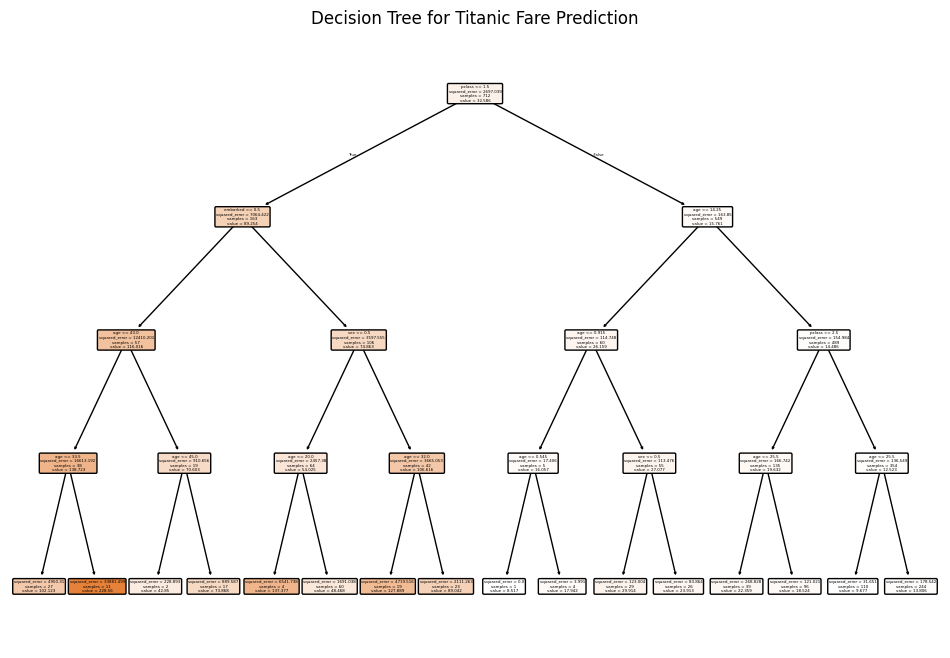

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree

# Load dataset
df = sns.load_dataset("titanic")

# Handle missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Convert gender to numerical
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert embarkation port to numbers
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  # Fill missing embarkation values

# Select features and target variable
X = df[['age', 'sex', 'pclass', 'embarked']]  # Independent variables
y = df['fare']  # Target variable

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regression model
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print model evaluation results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare (Decision Tree Regression)")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Titanic Fare Prediction")
plt.show()


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

Confusion Matrix:
 [[96  9]
 [27 47]]


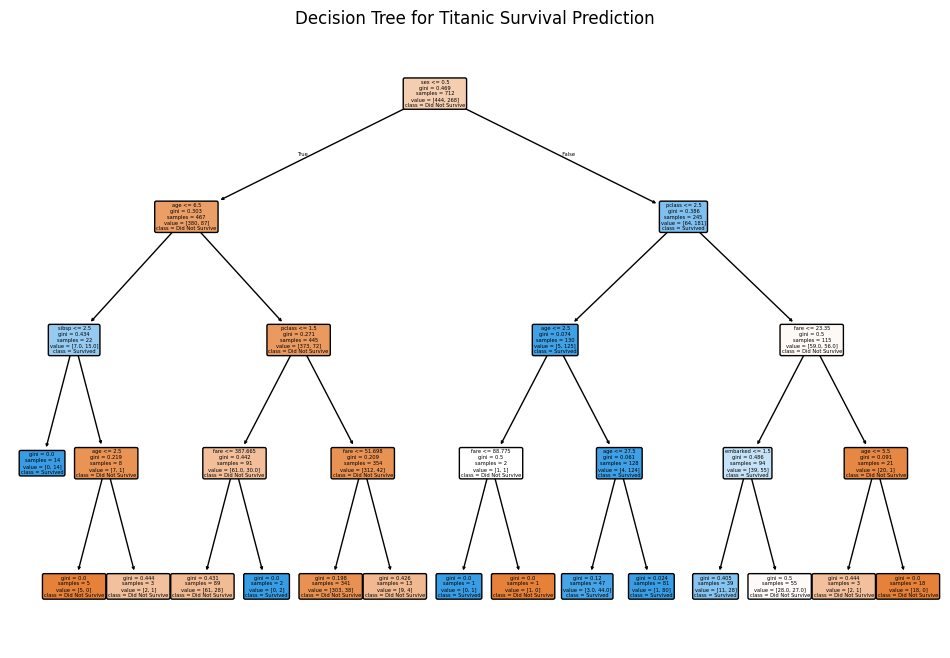

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Load dataset
df = sns.load_dataset("titanic")

# Handle missing values
df.loc[:, 'age'] = df['age'].fillna(df['age'].median())
df.loc[:, 'embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Convert gender to numerical
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert embarkation port to numbers

# Select features and target variable
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]  # Independent variables
y = df['survived']  # Target variable (0 = Did not survive, 1 = Survived)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classification model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Did Not Survive', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()
